# Dataset 4: Finding Association Rules on School Supplies Dataset 

*Notebook by: Allen Aboy, Franchezka Cruz, Christopher Pinpin - CSMODEL S12*

### Import Libaries 

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Dataset

For this notebook, we will be working on `Dataset 4`, whose context is ***school supplies*** bought in a bookstore. Each row in the dataset contains a list of items bought by a customer for a single transaction. 

### Reading the Dataset

To be able to explore our dataset, our first step is to load it using pandas. We will also be converting items represented as `float` to `int`.

In [84]:
supplies_df = pd.read_csv('Dataset4.csv', header = None)
supplies_df = supplies_df.astype(pd.Int32Dtype()) # convert float to int
supplies_df

,0,1,2,3,4,5,6,7
0,3,5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,5,9,10,11,12,14,<NA>,<NA>
3,2,5,6,13,<NA>,<NA>,<NA>,<NA>
4,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...
295,1,12,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
296,9,11,12,15,17,<NA>,<NA>,<NA>
297,1,6,7,8,10,15,18,<NA>
298,16,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [85]:
supplies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       300 non-null    Int32
 1   1       257 non-null    Int32
 2   2       213 non-null    Int32
 3   3       183 non-null    Int32
 4   4       152 non-null    Int32
 5   5       115 non-null    Int32
 6   6       71 non-null     Int32
 7   7       33 non-null     Int32
dtypes: Int32(8)
memory usage: 11.8 KB


**Associate Rule Mining** data mining technique will be used in this dataset which contains a total of 300 observations (rows) and 8 variables (columns). Data were represented using an integer between 0 to 19 and `<NA>` for no values. 
    
For our group, we assumed that each observation represents the number of consumer's basket when shopping for school supplies, wherein each row corresponds to a basket, numbering from 0 to 299. Each basket contains at most 8 school supplies, dependent to the number of columns from the dataset, from the 20 unique items from a bookstore. Contents of each row will be converted to a list of list, changing the integers into its corresponding string or school item.

In [86]:
values = supplies_df.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    
temp_df = supplies_df.stack().map(value_dict).unstack()

carts = []
for i in range(temp_df.shape[0]):
    cart = np.sort([int(x) for x in temp_df.iloc[i].values.tolist() if str(x) != 'nan'])
    carts.append(cart)
    
supplies_df = pd.DataFrame([[0 for _ in range(20)] for _ in range(300)], columns=values)

for i, cart in enumerate(carts):
    supplies_df.iloc[i, cart] = 1

    
supplies_df = supplies_df.reindex(sorted(supplies_df.columns), axis=1)

Let us assign names to the 20 unique items in the bookstore.

- 0: Bond Paper 
- 1: Index Card
- 2: Intermediate Pad Paper
- 3: Construction Paper
- 4: Pencil
- 5: Sharpener
- 6: Eraser
- 7: Marker
- 8: Yellow Pad
- 9: Crayon
- 10: Whiteboard
- 11: Ruler
- 12: Graph Paper
- 13: Protractor
- 14: Paint Brush
- 15: Poster Paint
- 16: Acrylic Paint
- 17: Watercolor
- 18: Canvas
- 19: Notebook


In [87]:
supplies_df.columns = ['Bond Paper','Index Card','Intermediate Pad Paper',
                        'Construction Paper','Pencil','Sharpener',
                        'Eraser','Marker','Yellow Pad',
                        'Crayon','Whiteboard','Ruler',
                        'Graph Paper','Protractor','Paint Brush',
                        'Poster Paint','Acrylic Paint','Watercolor',
                        'Canvas','Notebook']
supplies_df

,Bond Paper,Index Card,Intermediate Pad Paper,Construction Paper,Pencil,Sharpener,Eraser,Marker,Yellow Pad,Crayon,Whiteboard,Ruler,Graph Paper,Protractor,Paint Brush,Poster Paint,Acrylic Paint,Watercolor,Canvas,Notebook
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0
297,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,1,0
298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Let us display the content of each cart:


In [88]:
for i, cart in enumerate(carts):
    print('Cart', i, cart)

Cart 0 [0 1]
Cart 1 [2 3]
Cart 2 [1 4 5 6 7 8]
Cart 3 [ 1  3  9 10]
Cart 4 [0]
Cart 5 [ 3  4  6 10 11 12]
Cart 6 [ 3  4  6 10 13]
Cart 7 [ 1  9 12 14 15]
Cart 8 [11 12 16 17]
Cart 9 [ 1 11]
Cart 10 [14 18]
Cart 11 [ 5 12]
Cart 12 [ 1  3  4  7 18 19]
Cart 13 [ 4  9 12 13 17 18 19]
Cart 14 [ 7 15 16 18]
Cart 15 [4 7]
Cart 16 [ 0  5 10 11 12 13 17]
Cart 17 [ 2 12 16]
Cart 18 [ 4  6 10 13 15]
Cart 19 [ 5 14]
Cart 20 [ 0  4 17]
Cart 21 [ 0  2  4  6 11 12 16 19]
Cart 22 [ 4 11 12 13 15 18 19]
Cart 23 [ 2  8 16 18 19]
Cart 24 [18]
Cart 25 [ 2  3  5 11 12 13 15 18]
Cart 26 [ 1  2  4  5 11 19]
Cart 27 [17]
Cart 28 [ 7 12 19]
Cart 29 [ 3  4  7  8  9 13]
Cart 30 [ 2  3  5  9 11 19]
Cart 31 [ 0  1  6  9 12 13 14 15]
Cart 32 [4]
Cart 33 [ 0  3  7 10 14]
Cart 34 [16]
Cart 35 [15]
Cart 36 [ 3  4  8 11 15]
Cart 37 [ 3  7  9 10 14 18]
Cart 38 [ 1  3  6  9 10 14 17]
Cart 39 [ 2 11 17]
Cart 40 [ 2  8  9 12 13 14]
Cart 41 [ 5  7 19]
Cart 42 [ 3  4 11 12 13 19]
Cart 43 [ 2  3  5  7 11 16 18]
Cart 44 [ 2  3

In [89]:
supplies_df.describe()

,Bond Paper,Index Card,Intermediate Pad Paper,Construction Paper,Pencil,Sharpener,Eraser,Marker,Yellow Pad,Crayon,Whiteboard,Ruler,Graph Paper,Protractor,Paint Brush,Poster Paint,Acrylic Paint,Watercolor,Canvas,Notebook
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.253333,0.266667,0.240000,0.186667,0.213333,0.216667,0.196667,0.186667,0.243333,0.270000,0.166667,0.230000,0.230000,0.200000,0.186667,0.220000,0.196667,0.226667,0.240000,0.243333
std,0.435647,0.442956,0.427797,0.390295,0.410346,0.412662,0.398142,0.390295,0.429812,0.444701,0.373301,0.421536,0.421536,0.400668,0.390295,0.414938,0.398142,0.419375,0.427797,0.429812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

### What are the Top 5 most common items bought in the bookstore?

In [90]:
suppliesCount = []
for i in supplies_df.columns:
    supplyBought = supplies_df[i].value_counts()
    suppliesCount.append([i,supplyBought[1]])
    
suppliesCount.sort(key=lambda x: x[1], reverse=True)


supplies_df[supplies_df == 1].count() 

countSupplies = [] 
for i in range(len(suppliesCount)):
    countSupplies.append(suppliesCount[i][1])
        
nameSupplies = [] 
for i in range(len(suppliesCount)):
    nameSupplies.append(suppliesCount[i][0])
    

eda1_df = pd.DataFrame(data = countSupplies);
eda1_df.index = nameSupplies;

eda1_df.rename(columns={ eda1_df.columns[0]: "Supplies Bought" }, inplace = True)
eda1_df


,Supplies Bought
Crayon,81
Index Card,80
Bond Paper,76
Yellow Pad,73
Notebook,73
Intermediate Pad Paper,72
Canvas,72
Ruler,69
Graph Paper,69
Watercolor,68


In [91]:
eda1_df.describe()

,Supplies Bought
count,20.000000
mean,66.200000
std,8.605995
min,50.000000
25%,59.000000
50%,67.000000
75%,72.250000
max,81.000000


Text(0, 0.5, 'Supplies')

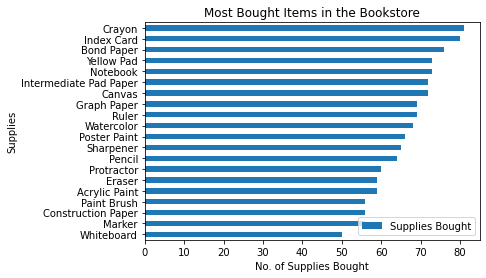

In [92]:
eda1_df.sort_values("Supplies Bought").plot.barh()
plt.title("Most Bought Items in the Bookstore")
plt.xlabel("No. of Supplies Bought")
plt.ylabel("Supplies")

We can see that the top 5 most bought items or items most present in the carts are `Crayon`, `Index Card`, `Bond Paper`, `Yellow Pad`, and `Notebook`

### What is the average number of items consumers buy in the bookstore?

Our second Exploratory Data Analysis question involves finding the average number of items do bookstore consumers buy from the selected 20 kinds of school supply. This would help us in determining the consumer's behavior in buying school supplies.

To answer the question, we first start provide a 

In [93]:
consumers = []
numItemsBought = []
    
for i in supplies_df.index:
    num = 0
    for column in supplies_df.columns:
        if supplies_df[column][i] == 1:
            num+=1
    consumers.append(f" {i}")
    numItemsBought.append(num)


eda2_df = pd.DataFrame(data = numItemsBought);
eda2_df.index = consumers
eda2_df.rename(columns={ eda2_df.columns[0]: "Items Bought" }, inplace = True)
describe = eda2_df.describe()

Afterwards, we use `pd.describe()` to get the descriptive statistics of the rearranged dataset, particularly the mean of the number of items consumers buy in the bookstore

In [94]:
describe

,Items Bought
count,300.000000
mean,4.413333
std,2.331080
min,1.000000
25%,2.000000
50%,5.000000
75%,6.000000
max,8.000000


From the results above, we can see that the mean number of items consumers buy in the bookstore is <b>4.41</b> with a standard deviation of <b>2.33</b> which entails a relatively low variability when it comes to consumer behavior.

Next, we use box plot to visualize the average number of items consumers buy and the some outliers from the consumers.

Text(0, 0.5, 'Number of Items')

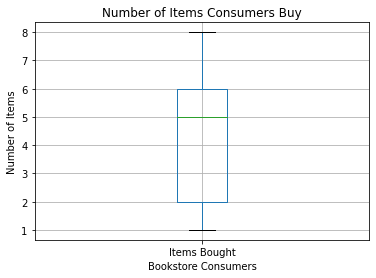

In [95]:
eda2_df.sort_values("Items Bought").boxplot()
plt.title("Number of Items Consumers Buy")
plt.xlabel("Bookstore Consumers")
plt.ylabel("Number of Items")

The mean number of items consumers from the bookstore buy is <b>4.41</b>, with the highest number of items bought is <b>8</b> and lowest is <b>1</b>. Upon examining the boxplot, the average number of items bought by consumers range around <b>2 to 6</b> items per consumer.

# Data Mining

**Association Rule Mining** will be used to model the dataset. With 20 unique items and 300 observations in the dataset, the Association Rule Mining will be most applicable technique to be used.

Import `RuleMiner` Class

In [96]:
from rule_miner import RuleMiner

Instantiate a `RuleMiner` object with `support_t` equal to `10` and `confidence_t` equal to `0.6`. The field `support_t` represents the support threshold, while the field `confidence_t` represents the confidence threshold.

In [97]:
rule_miner = RuleMiner(10, 0.6)

Using the provided support threshold and confidence threshold, what is/are the association rules that we derived from the dataset?

In [98]:
rule = rule_miner.get_association_rules(supplies_df)
print(rule)

[[['Intermediate Pad Paper', 'Whiteboard'], ['Index Card']], [['Index Card', 'Ruler'], ['Graph Paper']], [['Poster Paint', 'Ruler'], ['Crayon']]]


With support equal to 10 and confidence of 0.6, the association rules we derived from the dataset are: 

`{Intermediate Pad Paper, Whiteboard}` -> `{Index Card}`

`{Index Card, Ruler}` -> `{Graph Paper}`

`{Poster Paint, Ruler}` -> `{Crayon}`

## Insights and Conclusion

After performing the association rule mining data mining technique to Dataset 4 with a support of 10 and confidence of 0.6, we can see that people who bought: 
- **Intermediate Pad Paper and Whiteboard** in one transaction are likely to buy **Index Card**
- **Index Card and Ruler** in one transaction are likely to buy **Graph Paper**
- **Poster Paint and Ruler** in one transaction are likely to buy **Crayon**